In [39]:
#put imports here
import pandas as pd
import os as _dir
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


In [3]:
#working_dir = _dir.getcwd()
#csv_path = "top10s.csv"
#for root, dirs, files in _dir.walk(working_dir):
    #if csv_path in files:
        #csv_path = (_dir.path.join(root, csv_path))
        
song_df=pd.read_csv("C:\\Users\\pmaxl\\OneDrive\\Desktop\\Group-Projects\\Teams-Challenge\\Resources\\top10s.csv",encoding="ISO-8859-1")



In [91]:
cln_songs=song_df[song_df['dB']>-20]
print(len(cln_songs))
print(len(song_df))

602
603


In [93]:
cols=['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
years=song_df['year'].unique()

songs2010=cln_songs[cln_songs['year']==2010]
songs2011=cln_songs[cln_songs['year']==2011]
songs2012=cln_songs[cln_songs['year']==2012]
songs2013=cln_songs[cln_songs['year']==2013]
songs2014=cln_songs[cln_songs['year']==2014]
songs2015=cln_songs[cln_songs['year']==2015]
songs2016=cln_songs[cln_songs['year']==2016]
songs2017=cln_songs[cln_songs['year']==2017]
songs2018=cln_songs[cln_songs['year']==2018]
songs2019=cln_songs[cln_songs['year']==2019]

p_values={'bpm': [],
         'nrgy': [],
         'dnce': [],
         'dB': [],
         'live': [],
         'val': [],
         'dur': [],
         'acous': [],
         'spch': []
         }

cols_of_interest = []


print("P-Values")
print("=============")

for x in cols:
    data={'2010': songs2010[x],
         '2011': songs2011[x],
         '2012': songs2012[x], 
         '2013': songs2013[x],
         '2014': songs2014[x],
         '2015': songs2015[x],
         '2016': songs2016[x],
         '2017': songs2017[x],
         '2018': songs2018[x],
         '2019': songs2019[x]
         }
    
    
    
    df=pd.DataFrame(data)
    
    anova_x=stats.f_oneway(songs2010[x],
                          songs2011[x],
                          songs2012[x],
                          songs2013[x],
                          songs2014[x],
                          songs2015[x],
                          songs2016[x],
                          songs2017[x],
                          songs2018[x],
                          songs2019[x]
                          )
    print(f'{x}: {anova_x[1]}')
    
    if anova_x[1]<0.05: cols_of_interest.append(x)
        
    
    for y in range(len(years)-1):
        tt_result=stats.ttest_ind(df.iloc[:,y], df.iloc[:,y+1], equal_var=False, nan_policy='omit')
        p_values[x].append(tt_result[1])


pv_df=pd.DataFrame(p_values)

pv_df=pv_df[cols_of_interest]

P-Values
bpm: 0.36967973195039544
nrgy: 3.73875679491185e-05
dnce: 0.17862413007400588
dB: 0.00033079933395437647
live: 0.06596956774617194
val: 0.012335092578973217
dur: 2.155622201166031e-06
acous: 0.02358298459505646
spch: 0.2468304343030727


In [77]:
year_ranges=['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']

pv_df.index=year_ranges
pv_df

,nrgy,dB,val,dur,acous
2010-2011,0.315798,0.670561,0.434159,0.069026,0.673638
2011-2012,0.840209,0.609837,0.017232,0.006575,0.014135
2012-2013,0.558790,0.371265,0.008782,0.123504,0.031619
2013-2014,0.047062,0.045532,0.791735,0.121015,0.051916
2014-2015,0.381852,0.603190,0.915617,0.883263,0.810216
2015-2016,0.242873,0.137364,0.034071,0.517957,0.836922
2016-2017,0.495515,0.144251,0.048451,0.701567,0.840680
2017-2018,0.141768,0.847110,0.361406,0.360041,0.256730
2018-2019,0.837358,0.783014,0.678636,0.010960,0.058223


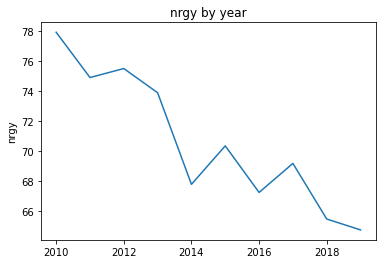

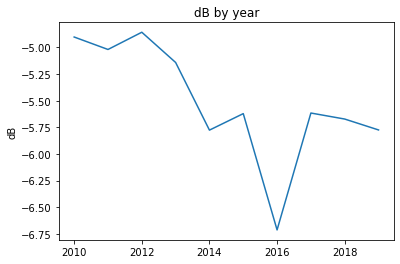

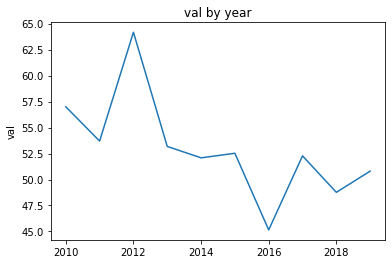

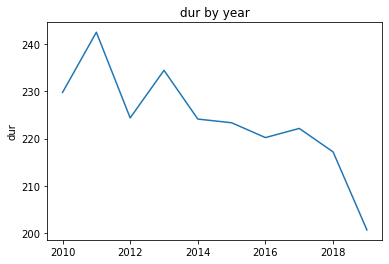

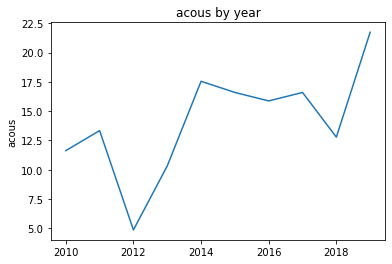

In [79]:
by_year=song_df.groupby('year')
for x in cols_of_interest:
    var=by_year[x].mean()
    
    plt.figure
    plt.plot(var.index, var)
    plt.title(f'{x} by year')
    plt.ylabel(x)
    plt.show()